In [109]:
install.packages("stargazer")
install.packages("gridExtra")

Installing package into 'C:/Users/petr.pham/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'stargazer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\petr.pham\AppData\Local\Temp\RtmpEZMHwI\downloaded_packages


In [121]:
require(dplyr)
require(ggplot2)
require(gridExtra)
require(stargazer)
require(maxLik)
require(quantreg)

Loading required package: quantreg
Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



In [14]:
getwd() 

[1] "D:/IES/Ecox/HW_1"

In [38]:
df <- as.data.frame(read.csv(file = "hw1_data.csv", sep = ",", header = TRUE))

In [39]:
df

X1,X2,Y1,Y2,Y3,Y4
10,8,8.04,9.14,7.46,6.58
8,8,6.95,8.14,6.77,5.76
13,8,7.58,8.74,12.74,7.71
9,8,8.81,8.77,7.11,8.84
11,8,8.33,9.26,7.81,8.47
14,8,9.96,8.10,8.84,7.04
6,8,7.24,6.13,6.08,5.25
4,19,4.26,3.10,5.39,12.50
12,8,10.84,9.13,8.15,5.56
7,8,4.82,7.26,6.42,7.91


In [40]:
str(df)

'data.frame':	11 obs. of  6 variables:
 $ X1: int  10 8 13 9 11 14 6 4 12 7 ...
 $ X2: int  8 8 8 8 8 8 8 19 8 8 ...
 $ Y1: num  8.04 6.95 7.58 8.81 8.33 ...
 $ Y2: num  9.14 8.14 8.74 8.77 9.26 8.1 6.13 3.1 9.13 7.26 ...
 $ Y3: num  7.46 6.77 12.74 7.11 7.81 ...
 $ Y4: num  6.58 5.76 7.71 8.84 8.47 7.04 5.25 12.5 5.56 7.91 ...


In [90]:
s11 <- df %>% select("X1", "Y1")
s12 <- df %>% select("X1", "Y2")
s13 <- df %>% select("X1", "Y3")
s24 <- df %>% select("X2", "Y4")

In [91]:
s11plot <- ggplot(s11, aes(x = X1, y = Y1)) + geom_point(color = "blue") + geom_abline(color = "red") + xlim(min(df %>% select(1:2)), max(df %>% select(1:2))) + ylim(min(df %>% select(3:6)), max(df %>% select(3:6)))
s12plot <- ggplot(s12, aes(x = X1, y = Y2)) + geom_point(color = "blue") + geom_abline(color = "red") + xlim(min(df %>% select(1:2)), max(df %>% select(1:2))) + ylim(min(df %>% select(3:6)), max(df %>% select(3:6)))
s13plot <- ggplot(s13, aes(x = X1, y = Y3)) + geom_point(color = "blue") + geom_abline(color = "red") + xlim(min(df %>% select(1:2)), max(df %>% select(1:2))) + ylim(min(df %>% select(3:6)), max(df %>% select(3:6)))
s24plot <- ggplot(s24, aes(x = X2, y = Y4)) + geom_point(color = "blue") + geom_abline(color = "red") + xlim(min(df %>% select(1:2)), max(df %>% select(1:2))) + ylim(min(df %>% select(3:6)), max(df %>% select(3:6)))

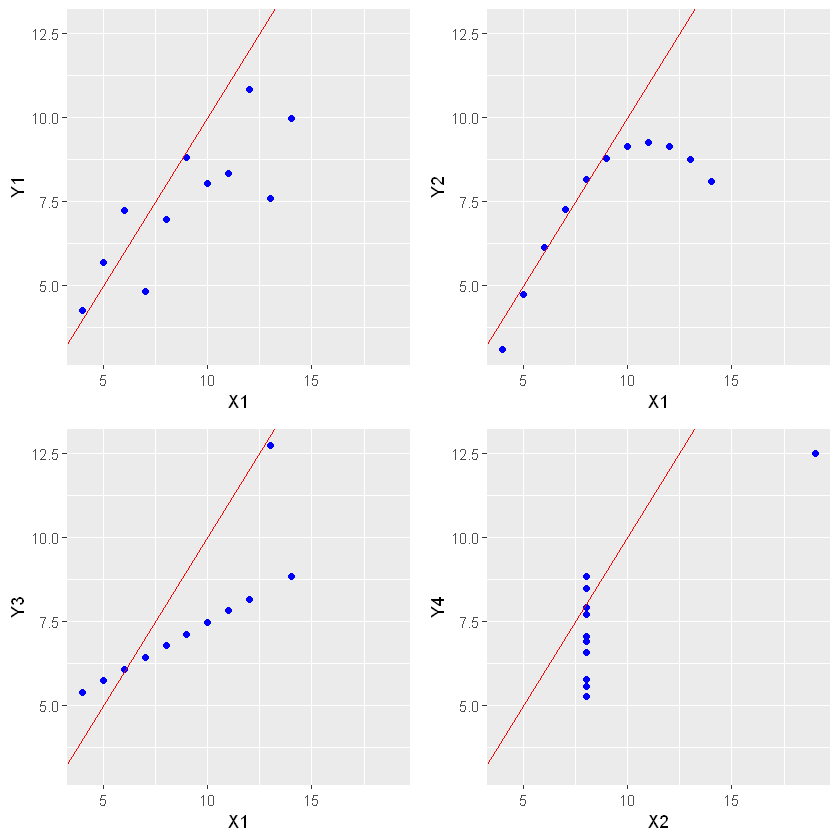

In [92]:
grid.arrange(s11plot, s12plot, s13plot, s24plot)

In [ ]:
#1/ OLS and MLE

In [119]:
s11ols <- lm(Y1 ~ X1, data = s11)
s12ols <- lm(Y2 ~ X1, data = s12)
s13ols <- lm(Y3 ~ X1, data = s13)
s24ols <- lm(Y4 ~ X2, data = s24)

In [128]:
stargazer(s11ols, s12ols, s13ols, s24ols,
          type="text", covariate.labels = c("X1","X2", "Intercept"), 
          column.labels = c("s11ols", "s12ols", "s13ols", "s24ols"))


                                            Dependent variable:                
                             --------------------------------------------------
                                Y1        Y2        Y3        Y4         Y1    
                                OLS       OLS       OLS       OLS     quantile 
                                                                     regression
                              s11ols    s12ols    s13ols    s24ols             
                                (1)       (2)       (3)       (4)       (5)    
-------------------------------------------------------------------------------
X1                           0.500***  0.500***  0.500***             0.480**  
                              (0.118)   (0.118)   (0.118)             (0.179)  
                                                                               
X2                                                         0.500***            
                                       

In [ ]:
#3/ LAD vs OLS

In [123]:
s11lad <- rq(Y1 ~ X1, data = s11, 0.5)
s12lad <- rq(Y2 ~ X1, data = s12, 0.5)
s13lad <- rq(Y3 ~ X1, data = s13, 0.5)
s24lad <- rq(Y4 ~ X2, data = s24, 0.5) # solution may be non-unique

Warning message in rq.fit.br(x, y, tau = tau, ...):
"Solution may be nonunique"

In [201]:
stargazer(s11ols, s12ols, s13ols, s24ols, s11lad, s12lad, s13lad, s24lad,
          type="text", covariate.labels = c("X1","X2", "Intercept"), 
          column.labels = c("s11ols", "s12ols", "s13ols", "s24ols", "s11lad", "s12lad", "s13lad", "s24lad"))


                                                             Dependent variable:                                
                             -----------------------------------------------------------------------------------
                                Y1        Y2        Y3        Y4         Y1         Y2         Y3         Y4    
                                OLS       OLS       OLS       OLS     quantile   quantile   quantile   quantile 
                                                                     regression regression regression regression
                              s11ols    s12ols    s13ols    s24ols     s11lad     s12lad     s13lad     s24lad  
                                (1)       (2)       (3)       (4)       (5)        (6)        (7)        (8)    
----------------------------------------------------------------------------------------------------------------
X1                           0.500***  0.500***  0.500***             0.480**    0.500**    0.3

In [164]:
quantiles <- list(0.05, 0.25, 0.50, 0.75, 0.95)
samples <- list("s11", "s12", "s13", "s24")

In [212]:
quantmodels <- list()

In [213]:
for (quantile in quantiles) { 
    for (sample in samples) {
        assign(paste(sample, "q", quantile, sep=""), summary(rq(Y1 ~ X1, data = s11, quantile)))
        quantmodels <- append(quantmodels, paste(sample, "q", quantile, sep=""))
    }
}

In [191]:
summary(s11q0.05)


Call: rq(formula = Y1 ~ X1, tau = quantile, data = s11)

tau: [1] 0.05

Coefficients:
            coefficients   lower bd       upper bd      
(Intercept)   1.600000e+00 -1.797693e+308   2.859450e+00
X1            4.600000e-01 -1.797693e+308  1.797693e+308

[[1]]
[1] "s11q0.05"